<a href="https://colab.research.google.com/github/millennial-geoscience/Common_Ss_geodata_examples/blob/main/Compter_vision_fault_masks_from_horizon_interp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Just need to convert edge mask to polylines.

In [ ]:
!pip install pykrige
import pandas as pd
import pykrige
from pykrige.uk import UniversalKriging
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import os
import cv2
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [152]:
pnts = pd.read_csv('pnbsct_hz_by_il_xl.dat',delim_whitespace=True,usecols=(0,1,2),names=['hy','hx','hz'])
hxmin, hxmax = pnts['hx'].min(), pnts['hx'].max()
hymax, hymax = pnts['hy'].min(), pnts['hy'].max() 
hzmin, hzmax = pnts['hz'].max(), pnts['hz'].max()

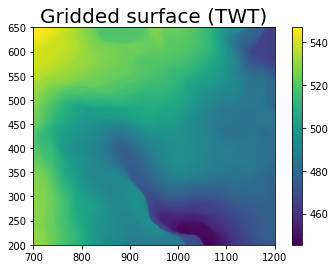

In [153]:
from scipy.interpolate import griddata
grid_i, grid_j = np.mgrid[hxmin:hxmax:(hxmax*1j),hymin:hymax:(hymax*1j)]
grid_k0 = griddata((pnts['hx'],pnts['hy']), pnts['hz'], (grid_i, grid_j), method='nearest')
rot = np.rot90(grid_k0)
rott = np.flipud(rot)
plt.imshow(rott, origin='lower',extent=[hxmin,hxmax,hymin,hymax])
plt.title('Gridded surface (TWT)', fontsize=20)
plt.colorbar()
plt.show()

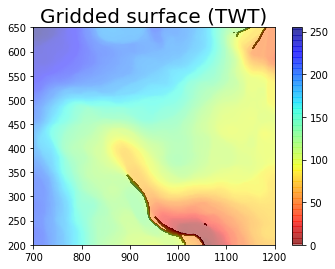

In [157]:
scaled = 256*((rott-hzmin)/(hzmax-hzmin)+1)
formatted = scaled.astype(np.uint8)
edges = cv2.Canny(formatted, 50, 50)

plt.imshow(edges, origin='lower', cmap='gray_r',vmin=0, vmax=1,extent=[hxmin,hxmax,hymin,hymax])
plt.imshow(formatted, origin='lower', cmap='jet_r',alpha=0.5,extent=[hxmin,hxmax,hymin,hymax])
plt.title('Gridded surface (TWT)', fontsize=20)
plt.colorbar()
plt.show()

In [ ]:
x = np.round(hy,decimals=2)
y = np.round(hx,decimals=2)
z = np.round(zcon,decimals=4)
depth_xyz = list(zip(x,y,z))
np.savetxt('Penobscot_depth_xyz.txt',depth_xyz,delimiter='  ')